In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from yolo_config import Config

In [2]:
all_results_path = os.path.join(Config.RUNS_DIR, Config.DATASET, 'all_results.csv')
all_results = pd.read_csv(all_results_path, index_col=0)
all_results

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness,TP,FP,FN,TN,FPR,FNR,TPR
yolov8n.pt_conf_0.1,0.875083,0.796863,0.858912,0.635107,0.657488,8.0,1.5,2.2,0.0,1.0,0.2157,0.7843
yolov8n.pt_conf_0.2,0.883473,0.786863,0.855448,0.636296,0.658211,8.0,1.5,2.2,0.0,1.0,0.2157,0.7843
yolov8n.pt_conf_0.3,0.890732,0.757773,0.842042,0.629251,0.650530,7.9,1.3,2.3,0.0,1.0,0.2255,0.7745
yolov8n.pt_conf_0.4,0.912809,0.703660,0.819670,0.619524,0.639539,7.3,0.7,2.9,0.0,1.0,0.2843,0.7157
yolov8n.pt_conf_0.5,0.918492,0.630606,0.789243,0.605366,0.623754,6.5,0.4,3.7,0.0,1.0,0.3627,0.6373
yolov8n.pt_conf_0.6,0.928214,0.581313,0.767738,0.594159,0.611517,6.0,0.3,4.2,0.0,1.0,0.4118,0.5882
yolov8n.pt_conf_0.7,0.942048,0.486667,0.723999,0.562065,0.578258,5.1,0.2,5.1,0.0,1.0,0.5000,0.5000
yolov8n.pt_conf_0.8,0.965714,0.335303,0.656580,0.519708,0.533395,3.5,0.1,7.0,0.0,1.0,0.6667,0.3333
yolov8n.pt_conf_0.9,0.700000,0.098939,0.399465,0.331464,0.338264,1.0,0.0,9.2,0.0,NaN,0.9020,0.0980
yolov8s.pt_conf_0.1,0.907035,0.801981,0.862546,0.622334,0.646355,7.9,2.3,2.3,0.0,1.0,0.2255,0.7745


In [3]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nano_models = [f'yolov8n.pt_conf_{conf}' for conf in thresholds]
nano_results = all_results.loc[nano_models]

small_models = [f'yolov8s.pt_conf_{conf}' for conf in thresholds]
small_results = all_results.loc[small_models]

medium_models = [f'yolov8m.pt_conf_{conf}' for conf in thresholds]
medium_results = all_results.loc[medium_models]


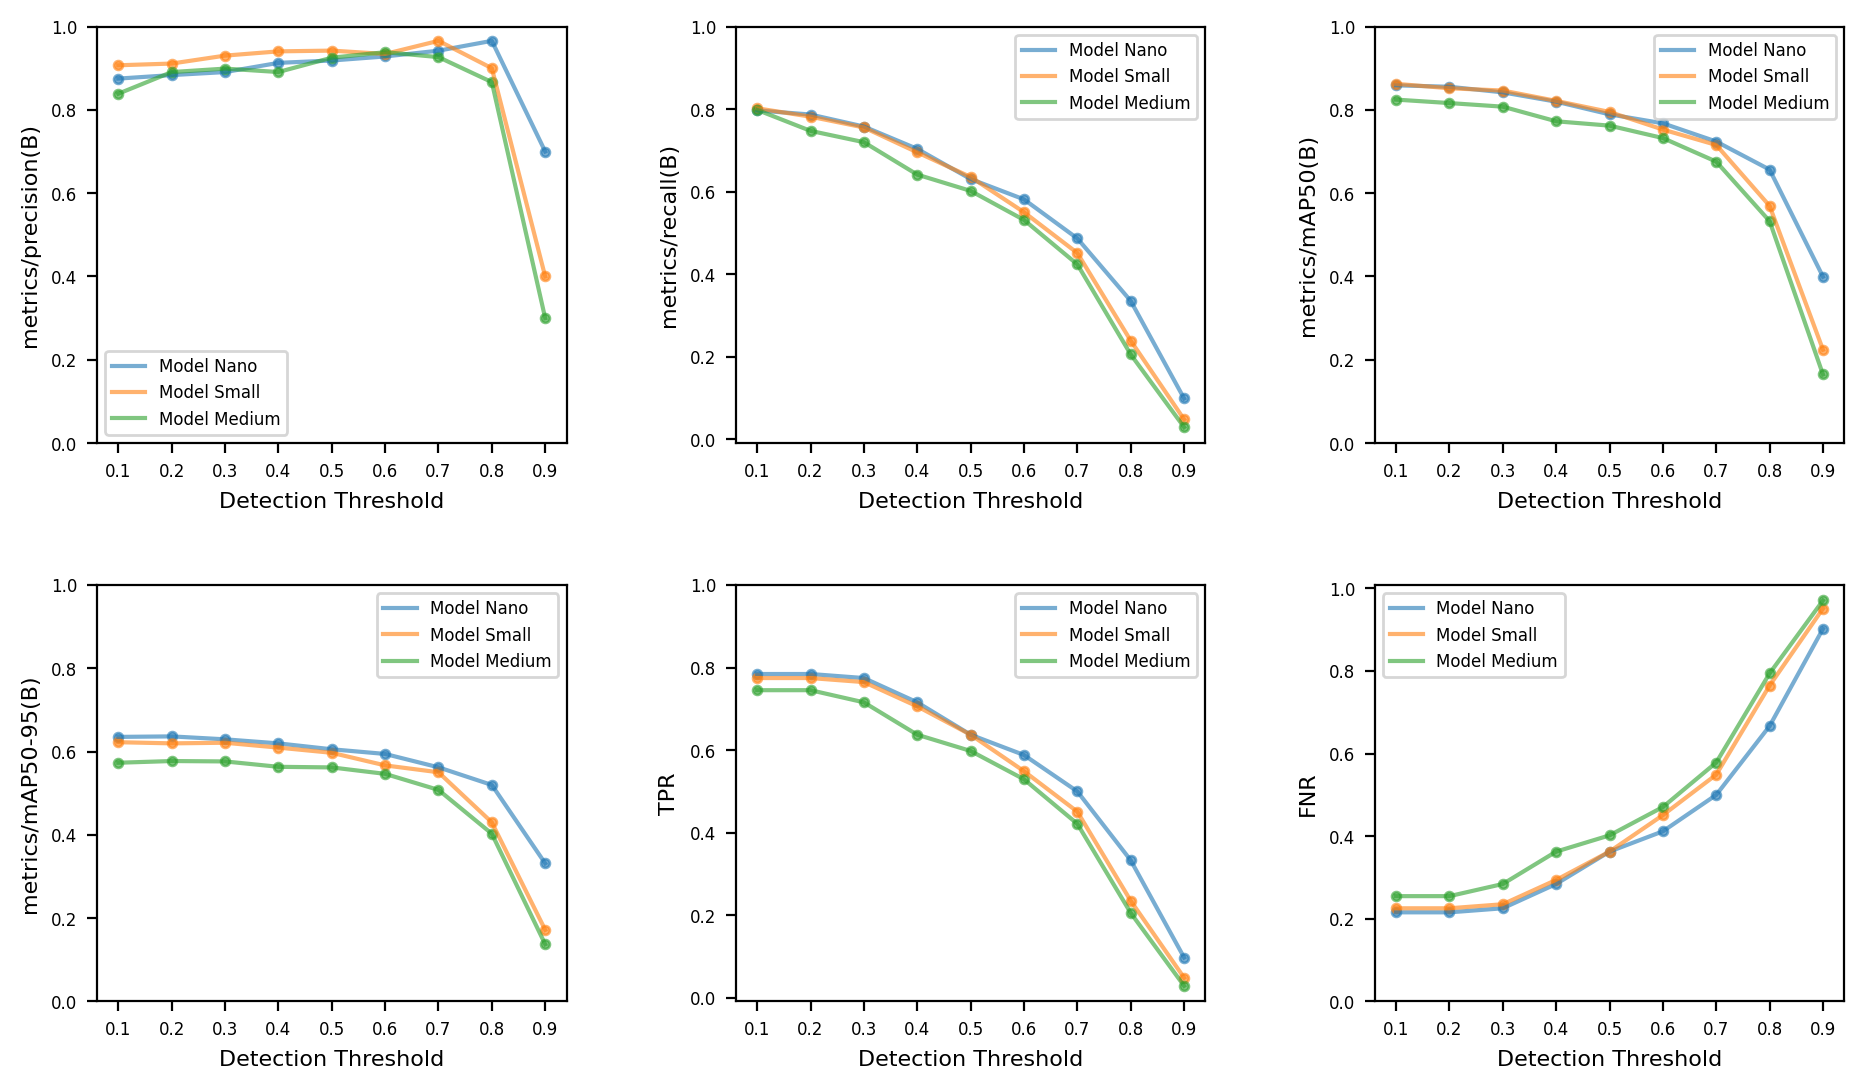

In [4]:

metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'TPR', 'FNR']


fig, axes = plt.subplots(2, 3, figsize=(10,6), dpi=200)
fig.tight_layout(pad=3)
axes = axes.flat

for i, metric in enumerate(metrics):

    ax = axes[i]

    ax.plot(thresholds, nano_results[metric], alpha=0.6, label='Model Nano')
    ax.scatter(thresholds, nano_results[metric], alpha=0.6, s=10)
    ax.plot(thresholds, small_results[metric], alpha=0.6, label='Model Small')
    ax.scatter(thresholds, small_results[metric], alpha=0.6, s=10)
    ax.plot(thresholds, medium_results[metric], alpha=0.6, label='Model Medium')
    ax.scatter(thresholds, medium_results[metric], alpha=0.6, s=10)

    ax.legend(fontsize=6)

    y_ticks = np.round(np.arange(0,1.1,0.2), 1)
    ax.set_yticks(y_ticks, labels=y_ticks, fontsize=6)
    ax.set_xticks(thresholds, labels=thresholds, fontsize=6)

    ax.set_xlabel("Detection Threshold", fontsize=8)
    ax.set_ylabel(metric, fontsize=8)
